## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9651438	total: 48.2ms	remaining: 48.2s
1:	learn: 0.9438140	total: 49.2ms	remaining: 24.5s
2:	learn: 0.9234602	total: 50.3ms	remaining: 16.7s
3:	learn: 0.9065531	total: 51.3ms	remaining: 12.8s
4:	learn: 0.8878163	total: 52.3ms	remaining: 10.4s
5:	learn: 0.8705003	total: 53.3ms	remaining: 8.84s
6:	learn: 0.8526342	total: 54.5ms	remaining: 7.73s
7:	learn: 0.8356255	total: 55.6ms	remaining: 6.89s
8:	learn: 0.8194857	total: 56.6ms	remaining: 6.24s
9:	learn: 0.8032474	total: 57.7ms	remaining: 5.72s
10:	learn: 0.7876646	total: 58.8ms	remaining: 5.29s
11:	learn: 0.7728110	total: 59.9ms	remaining: 4.93s
12:	learn: 0.7580140	total: 60.9ms	remaining: 4.62s
13:	learn: 0.7427379	total: 61.9ms	remaining: 4.36s
14:	learn: 0.7288061	total: 63ms	remaining: 4.13s
15:	learn: 0.7140270	total: 64ms	remaining: 3.94s
16:	learn: 0.7024466	total: 65.2ms	remaining: 3.77s
17:	learn: 0.6893953	total: 66.4ms	remaining: 3.62s
18:	learn: 0.6776995	total: 67.4ms	remaining: 3.4

91:	learn: 0.3130411	total: 144ms	remaining: 1.42s
92:	learn: 0.3115953	total: 145ms	remaining: 1.42s
93:	learn: 0.3093556	total: 146ms	remaining: 1.41s
94:	learn: 0.3072459	total: 147ms	remaining: 1.4s
95:	learn: 0.3052604	total: 148ms	remaining: 1.4s
96:	learn: 0.3036290	total: 149ms	remaining: 1.39s
97:	learn: 0.3017950	total: 151ms	remaining: 1.39s
98:	learn: 0.3002632	total: 152ms	remaining: 1.38s
99:	learn: 0.2993048	total: 153ms	remaining: 1.37s
100:	learn: 0.2982039	total: 154ms	remaining: 1.37s
101:	learn: 0.2965686	total: 155ms	remaining: 1.36s
102:	learn: 0.2952415	total: 156ms	remaining: 1.36s
103:	learn: 0.2937594	total: 157ms	remaining: 1.35s
104:	learn: 0.2924473	total: 158ms	remaining: 1.34s
105:	learn: 0.2914347	total: 159ms	remaining: 1.34s
106:	learn: 0.2905257	total: 160ms	remaining: 1.33s
107:	learn: 0.2890776	total: 161ms	remaining: 1.33s
108:	learn: 0.2873370	total: 162ms	remaining: 1.32s
109:	learn: 0.2860125	total: 163ms	remaining: 1.31s
110:	learn: 0.2844962	t

222:	learn: 0.2043893	total: 277ms	remaining: 967ms
223:	learn: 0.2040892	total: 279ms	remaining: 966ms
224:	learn: 0.2035670	total: 280ms	remaining: 965ms
225:	learn: 0.2028538	total: 281ms	remaining: 963ms
226:	learn: 0.2022945	total: 282ms	remaining: 961ms
227:	learn: 0.2021768	total: 283ms	remaining: 959ms
228:	learn: 0.2018525	total: 284ms	remaining: 957ms
229:	learn: 0.2016873	total: 285ms	remaining: 955ms
230:	learn: 0.2011909	total: 286ms	remaining: 953ms
231:	learn: 0.2003371	total: 287ms	remaining: 952ms
232:	learn: 0.1997728	total: 289ms	remaining: 950ms
233:	learn: 0.1992345	total: 290ms	remaining: 948ms
234:	learn: 0.1988129	total: 291ms	remaining: 946ms
235:	learn: 0.1980658	total: 292ms	remaining: 945ms
236:	learn: 0.1978625	total: 293ms	remaining: 943ms
237:	learn: 0.1975792	total: 294ms	remaining: 941ms
238:	learn: 0.1967042	total: 295ms	remaining: 939ms
239:	learn: 0.1965219	total: 296ms	remaining: 937ms
240:	learn: 0.1960235	total: 297ms	remaining: 935ms
241:	learn: 

353:	learn: 0.1548165	total: 409ms	remaining: 747ms
354:	learn: 0.1546827	total: 410ms	remaining: 746ms
355:	learn: 0.1542477	total: 411ms	remaining: 744ms
356:	learn: 0.1541358	total: 412ms	remaining: 743ms
357:	learn: 0.1536891	total: 413ms	remaining: 741ms
358:	learn: 0.1535643	total: 414ms	remaining: 740ms
359:	learn: 0.1530192	total: 415ms	remaining: 738ms
360:	learn: 0.1524644	total: 416ms	remaining: 737ms
361:	learn: 0.1523569	total: 417ms	remaining: 736ms
362:	learn: 0.1520135	total: 418ms	remaining: 734ms
363:	learn: 0.1517027	total: 419ms	remaining: 733ms
364:	learn: 0.1514844	total: 420ms	remaining: 731ms
365:	learn: 0.1513131	total: 422ms	remaining: 731ms
366:	learn: 0.1508797	total: 423ms	remaining: 729ms
367:	learn: 0.1506199	total: 424ms	remaining: 728ms
368:	learn: 0.1504533	total: 425ms	remaining: 726ms
369:	learn: 0.1501616	total: 426ms	remaining: 725ms
370:	learn: 0.1498851	total: 427ms	remaining: 724ms
371:	learn: 0.1495919	total: 428ms	remaining: 722ms
372:	learn: 

484:	learn: 0.1195580	total: 539ms	remaining: 573ms
485:	learn: 0.1193243	total: 541ms	remaining: 572ms
486:	learn: 0.1190074	total: 542ms	remaining: 571ms
487:	learn: 0.1186672	total: 543ms	remaining: 570ms
488:	learn: 0.1184086	total: 544ms	remaining: 569ms
489:	learn: 0.1181188	total: 545ms	remaining: 567ms
490:	learn: 0.1178229	total: 546ms	remaining: 566ms
491:	learn: 0.1175568	total: 547ms	remaining: 565ms
492:	learn: 0.1173024	total: 548ms	remaining: 564ms
493:	learn: 0.1170474	total: 549ms	remaining: 563ms
494:	learn: 0.1167976	total: 551ms	remaining: 562ms
495:	learn: 0.1164322	total: 552ms	remaining: 561ms
496:	learn: 0.1162010	total: 553ms	remaining: 559ms
497:	learn: 0.1159849	total: 554ms	remaining: 558ms
498:	learn: 0.1156886	total: 555ms	remaining: 557ms
499:	learn: 0.1154487	total: 556ms	remaining: 556ms
500:	learn: 0.1151519	total: 557ms	remaining: 554ms
501:	learn: 0.1148909	total: 558ms	remaining: 553ms
502:	learn: 0.1146261	total: 559ms	remaining: 552ms
503:	learn: 

614:	learn: 0.0938441	total: 672ms	remaining: 421ms
615:	learn: 0.0936905	total: 674ms	remaining: 420ms
616:	learn: 0.0935246	total: 675ms	remaining: 419ms
617:	learn: 0.0933293	total: 676ms	remaining: 418ms
618:	learn: 0.0931766	total: 677ms	remaining: 417ms
619:	learn: 0.0930408	total: 679ms	remaining: 416ms
620:	learn: 0.0928077	total: 680ms	remaining: 415ms
621:	learn: 0.0926171	total: 681ms	remaining: 414ms
622:	learn: 0.0924227	total: 682ms	remaining: 413ms
623:	learn: 0.0922045	total: 683ms	remaining: 412ms
624:	learn: 0.0920365	total: 684ms	remaining: 410ms
625:	learn: 0.0918359	total: 685ms	remaining: 409ms
626:	learn: 0.0917271	total: 686ms	remaining: 408ms
627:	learn: 0.0915221	total: 687ms	remaining: 407ms
628:	learn: 0.0913792	total: 688ms	remaining: 406ms
629:	learn: 0.0912103	total: 689ms	remaining: 405ms
630:	learn: 0.0910079	total: 690ms	remaining: 404ms
631:	learn: 0.0908834	total: 691ms	remaining: 403ms
632:	learn: 0.0907082	total: 693ms	remaining: 402ms
633:	learn: 

742:	learn: 0.0760717	total: 811ms	remaining: 281ms
743:	learn: 0.0759653	total: 812ms	remaining: 280ms
744:	learn: 0.0757393	total: 814ms	remaining: 278ms
745:	learn: 0.0756077	total: 815ms	remaining: 277ms
746:	learn: 0.0755062	total: 816ms	remaining: 276ms
747:	learn: 0.0753286	total: 817ms	remaining: 275ms
748:	learn: 0.0751899	total: 818ms	remaining: 274ms
749:	learn: 0.0750907	total: 819ms	remaining: 273ms
750:	learn: 0.0750113	total: 820ms	remaining: 272ms
751:	learn: 0.0748683	total: 821ms	remaining: 271ms
752:	learn: 0.0747507	total: 822ms	remaining: 270ms
753:	learn: 0.0746346	total: 823ms	remaining: 269ms
754:	learn: 0.0744844	total: 824ms	remaining: 268ms
755:	learn: 0.0743843	total: 826ms	remaining: 266ms
756:	learn: 0.0742301	total: 827ms	remaining: 265ms
757:	learn: 0.0741636	total: 828ms	remaining: 264ms
758:	learn: 0.0740225	total: 829ms	remaining: 263ms
759:	learn: 0.0738773	total: 830ms	remaining: 262ms
760:	learn: 0.0737833	total: 831ms	remaining: 261ms
761:	learn: 

870:	learn: 0.0622734	total: 948ms	remaining: 140ms
871:	learn: 0.0621972	total: 949ms	remaining: 139ms
872:	learn: 0.0621113	total: 950ms	remaining: 138ms
873:	learn: 0.0620458	total: 951ms	remaining: 137ms
874:	learn: 0.0619605	total: 952ms	remaining: 136ms
875:	learn: 0.0619386	total: 953ms	remaining: 135ms
876:	learn: 0.0618331	total: 954ms	remaining: 134ms
877:	learn: 0.0616909	total: 955ms	remaining: 133ms
878:	learn: 0.0615945	total: 956ms	remaining: 132ms
879:	learn: 0.0615633	total: 957ms	remaining: 130ms
880:	learn: 0.0614742	total: 958ms	remaining: 129ms
881:	learn: 0.0614680	total: 959ms	remaining: 128ms
882:	learn: 0.0614177	total: 960ms	remaining: 127ms
883:	learn: 0.0613890	total: 961ms	remaining: 126ms
884:	learn: 0.0612847	total: 962ms	remaining: 125ms
885:	learn: 0.0611611	total: 963ms	remaining: 124ms
886:	learn: 0.0610428	total: 965ms	remaining: 123ms
887:	learn: 0.0608919	total: 966ms	remaining: 122ms
888:	learn: 0.0608052	total: 967ms	remaining: 121ms
889:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

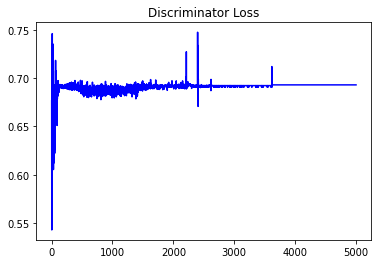

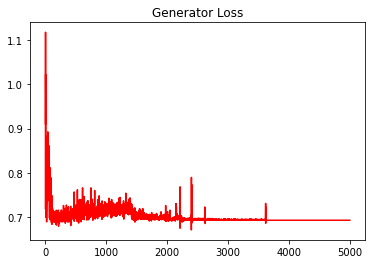

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

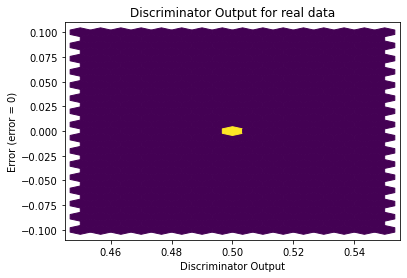

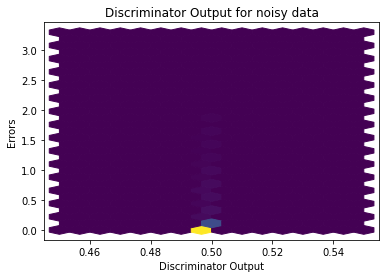

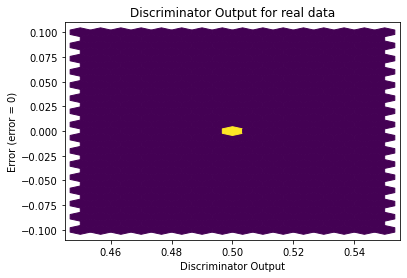

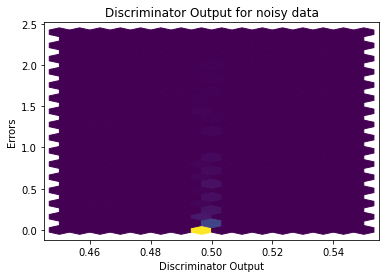

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


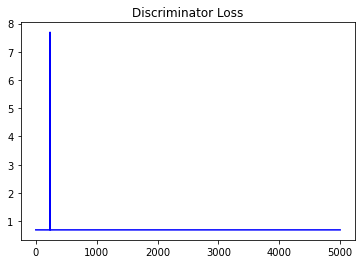

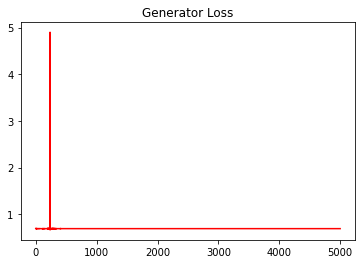

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

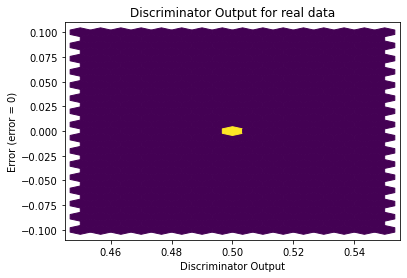

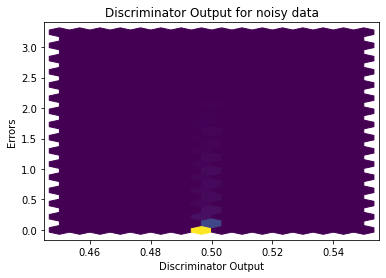

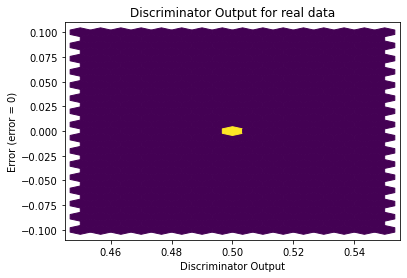

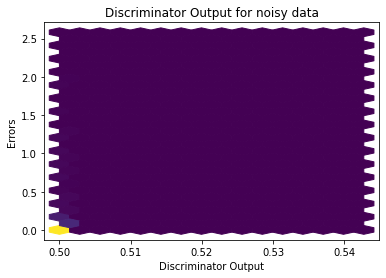

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[2.1281e-05]], device='cuda:0', requires_grad=True)
